## Importing and Cleaning Data

In [2]:
# Importing necessary libraries for data manipulation, visualization, and statistical analysis
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

In [3]:
# Reading the dataset into a pandas DataFrame and displaying the first few rows
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Displaying summary information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
# Calculating the number of missing values in each column of the dataset
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# Calculating the percentage of null values in the BMI column
percent_nulls = data['bmi'].isnull().mean() * 100
print(f'Percentage of null values in the BMI column: {percent_nulls:.2f}%')

Percentage of null values in the BMI column: 3.93%


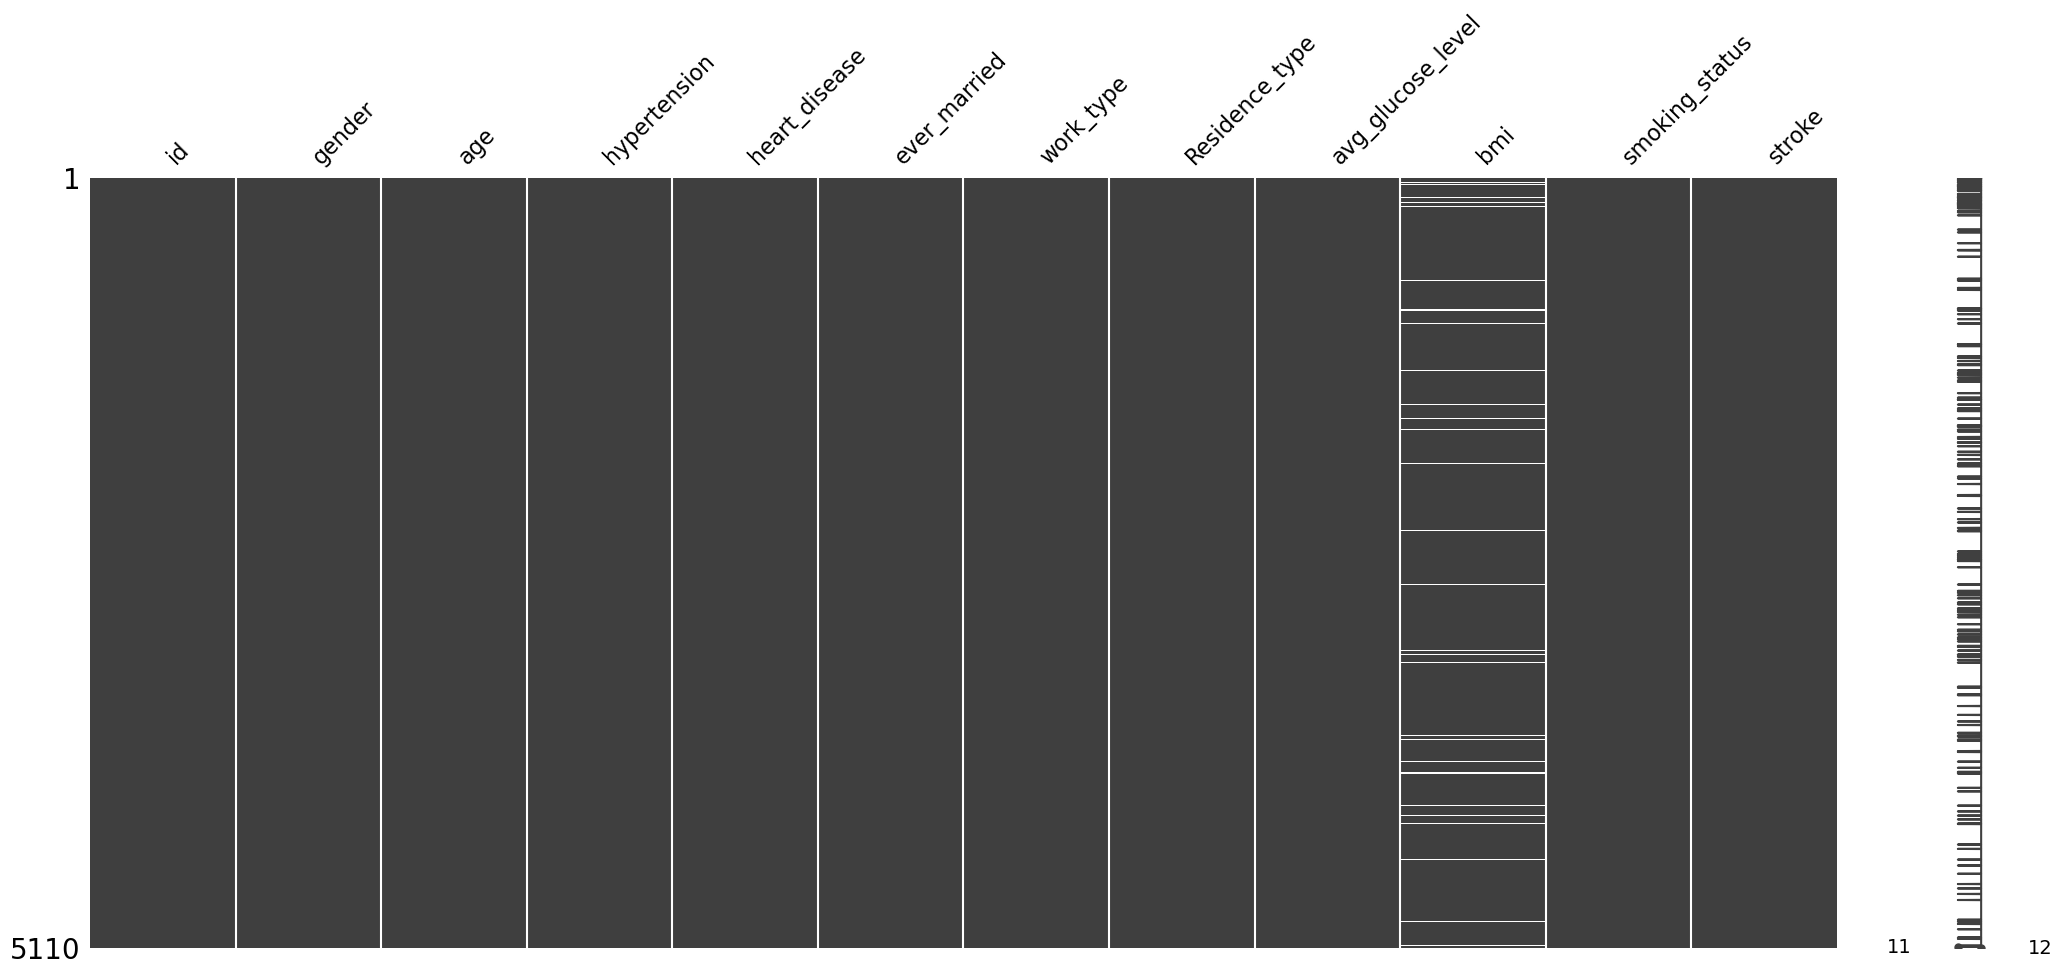

In [7]:
#Checking if data missing at random
msno.matrix(data)
plt.savefig('nulls.png', bbox_inches='tight')

In [8]:
# Converting the 'age' column to integer type
data['age'] = data['age'].astype(int)

In [9]:
# Checking unique values
print('gender: ', data['gender'].unique())
print('age: ', data['age'].sort_values().unique())
print('hypertension: ', data['hypertension'].unique())
print('heart_disease: ', data['heart_disease'].unique())
print('ever_married: ', data['ever_married'].unique())
print('work_type: ', data['work_type'].unique())
print('Residence_type: ', data['Residence_type'].unique())
print('smoking_status: ', data['smoking_status'].unique())
print('stroke: ', data['stroke'].unique())

gender:  ['Male' 'Female' 'Other']
age:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82]
hypertension:  [0 1]
heart_disease:  [1 0]
ever_married:  ['Yes' 'No']
work_type:  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type:  ['Urban' 'Rural']
smoking_status:  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke:  [1 0]


In [10]:
# Filtering rows where the 'gender' column has a value of 'Other'
data[data['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [11]:
# Filtering out a row where the 'gender' column is 'Other'
data = data[data['gender'] != 'Other']

In [12]:
# Generating descriptive statistics for numerical columns in the dataset
data.describe().round(2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.00,5109.00,5109.0,5109.00,5109.00,4908.00,5109.00
mean,36513.99,43.22,0.1,0.05,106.14,28.89,0.05
std,21162.01,22.63,0.3,0.23,45.29,7.85,0.22
min,67.00,0.00,0.0,0.00,55.12,10.30,0.00
25%,17740.00,25.00,0.0,0.00,77.24,23.50,0.00
50%,36922.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54643.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


In [13]:
# Creating age groups
bins = [-1, 2, 12, 18, 30, 45, 60, 100]
labels = ['0-2', '3-12', '13-18', '19-30', '31-45', '46-60', '61+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,61+
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,61+
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,61+
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,46-60
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,61+
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,61+
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,61+
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,31-45
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,46-60


In [14]:
# Calculating the median BMI grouped by 'gender' and 'age_group'
data.groupby(["gender","age_group"], observed=True)["bmi"].median()

gender  age_group
Female  0-2          18.10
        3-12         18.60
        13-18        24.10
        19-30        26.50
        31-45        29.30
        46-60        29.80
        61+          29.10
Male    0-2          18.90
        3-12         18.60
        13-18        23.60
        19-30        27.00
        31-45        30.65
        46-60        30.90
        61+          29.10
Name: bmi, dtype: float64

In [15]:
# Filling missing values in the 'bmi' column with the median BMI calculated for each gender and age group
data.loc[:, 'bmi'] = data['bmi'].fillna(data.groupby(['gender', 'age_group'], observed=True)['bmi'].transform('median'))

In [16]:
# Generating descriptive statistics for numerical columns in the updated dataset
data.describe().round(2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.00,5109.00,5109.0,5109.00,5109.00,5109.00,5109.00
mean,36513.99,43.22,0.1,0.05,106.14,28.88,0.05
std,21162.01,22.63,0.3,0.23,45.29,7.72,0.22
min,67.00,0.00,0.0,0.00,55.12,10.30,0.00
25%,17740.00,25.00,0.0,0.00,77.24,23.70,0.00
50%,36922.00,45.00,0.0,0.00,91.88,28.30,0.00
75%,54643.00,61.00,0.0,0.00,114.09,32.80,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


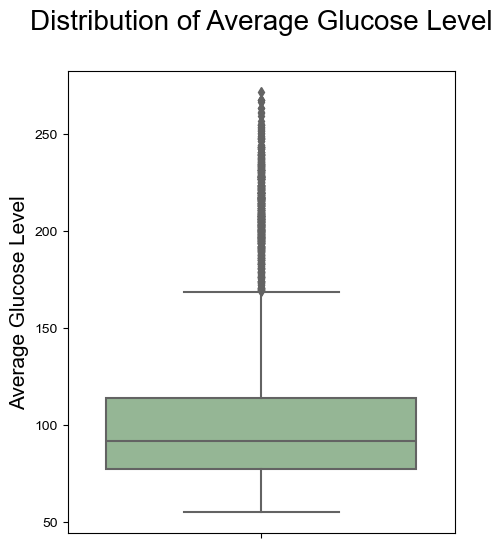

In [17]:
# Creating a boxplot to visualize the distribution of average glucose levels
fig, ax = plt.subplots(figsize=(5, 6))
sns.boxplot(y=data['avg_glucose_level'], color='darkseagreen', ax=ax)
sns.set_style("whitegrid")
plt.title('Distribution of Average Glucose Level', fontsize=20, pad=30)
plt.ylabel('Average Glucose Level', fontsize=15)
plt.savefig('avg_glucose_level.png', bbox_inches='tight')
plt.show()

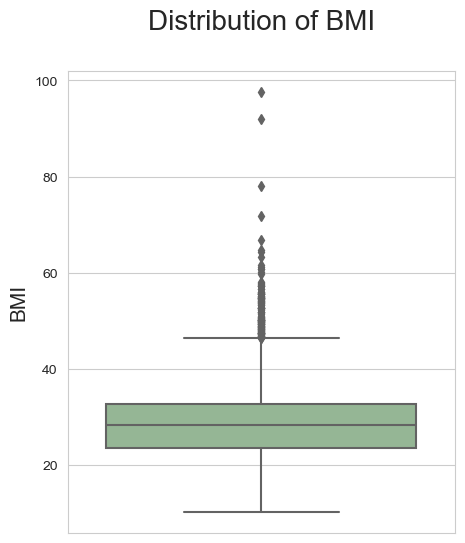

In [18]:
# Creating a boxplot to visualize the distribution of BMI
fig, ax = plt.subplots(figsize=(5, 6))
sns.boxplot(y=data['bmi'], color='darkseagreen', ax=ax)
sns.set_style("whitegrid")
plt.title('Distribution of BMI', fontsize=20, pad=30)
plt.ylabel('BMI', fontsize=15)
plt.savefig('bmi_dist.png', bbox_inches='tight')
plt.show()

In [19]:
# Function to remove outliers using Z-score method
def remove_outliers_zscore(df, column, threshold=3):
    z_scores = stats.zscore(df[column].dropna())
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < threshold)
    return df[filtered_entries]

# Removing outliers for 'avg_glucose_level' using Z-score method
data = remove_outliers_zscore(data, 'avg_glucose_level')

# Removing outliers for 'bmi' using Z-score method
data = remove_outliers_zscore(data, 'bmi')

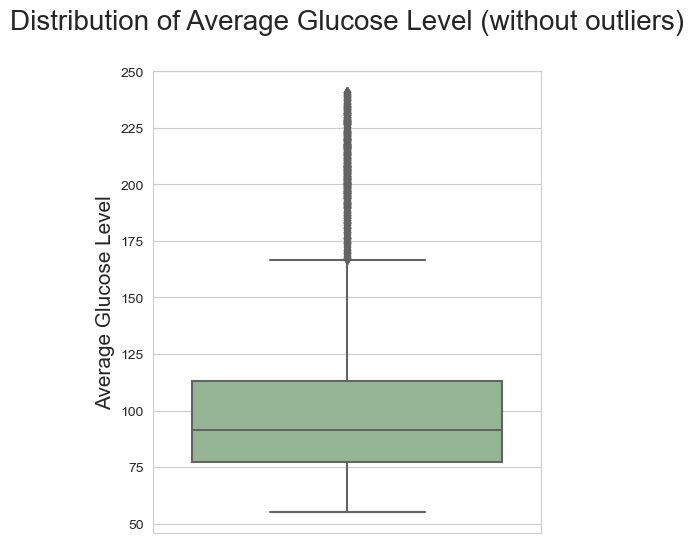

In [20]:
# Creating a boxplot to visualize the distribution of 'avg_glucose_level' without outliers
fig, ax = plt.subplots(figsize=(5, 6))
sns.boxplot(y=data['avg_glucose_level'], color='darkseagreen', ax=ax)
sns.set_style("whitegrid")
plt.title('Distribution of Average Glucose Level (without outliers)', fontsize=20, pad=30)
plt.ylabel('Average Glucose Level', fontsize=15)
plt.savefig('avg_glucose_level_without_outliers.png', bbox_inches='tight')
plt.show()

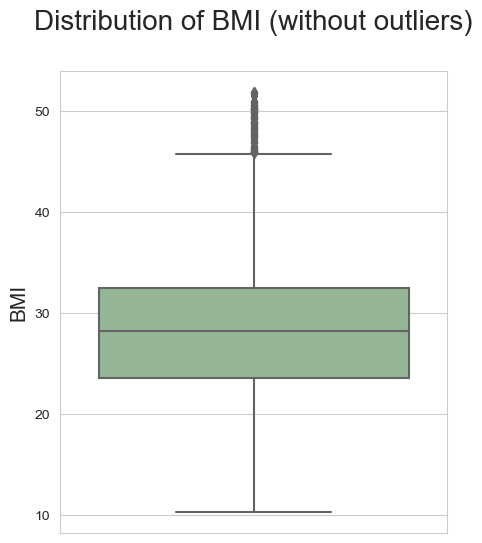

In [21]:
# Creating a boxplot to visualize the distribution of 'bmi' without outliers
fig, ax = plt.subplots(figsize=(5, 6))
sns.boxplot(y=data['bmi'], color='darkseagreen', ax=ax)
sns.set_style("whitegrid")
plt.title('Distribution of BMI (without outliers)', fontsize=20, pad=30)
plt.ylabel('BMI', fontsize=15)
plt.savefig('bmi_without_outliers.png', bbox_inches='tight')
plt.show()

In [22]:
# Checking the descriptive statistics of the dataset after removing outliers
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,36549.914417,42.977205,0.093781,0.053189,104.526063,28.507578,0.047790
std,21117.992551,22.688047,0.291553,0.224433,42.893192,7.023836,0.213344
min,67.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17762.000000,25.000000,0.000000,0.000000,77.070000,23.600000,0.000000
50%,36969.000000,44.000000,0.000000,0.000000,91.570000,28.200000,0.000000
75%,54620.000000,61.000000,0.000000,0.000000,112.960000,32.500000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,240.860000,51.900000,1.000000


In [23]:
# Checking the information about the dataset after data cleaning
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5001 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5001 non-null   int64   
 1   gender             5001 non-null   object  
 2   age                5001 non-null   int64   
 3   hypertension       5001 non-null   int64   
 4   heart_disease      5001 non-null   int64   
 5   ever_married       5001 non-null   object  
 6   work_type          5001 non-null   object  
 7   Residence_type     5001 non-null   object  
 8   avg_glucose_level  5001 non-null   float64 
 9   bmi                5001 non-null   float64 
 10  smoking_status     5001 non-null   object  
 11  stroke             5001 non-null   int64   
 12  age_group          5001 non-null   category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 513.1+ KB


## Exploratory Data Analysis and Visualizations

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


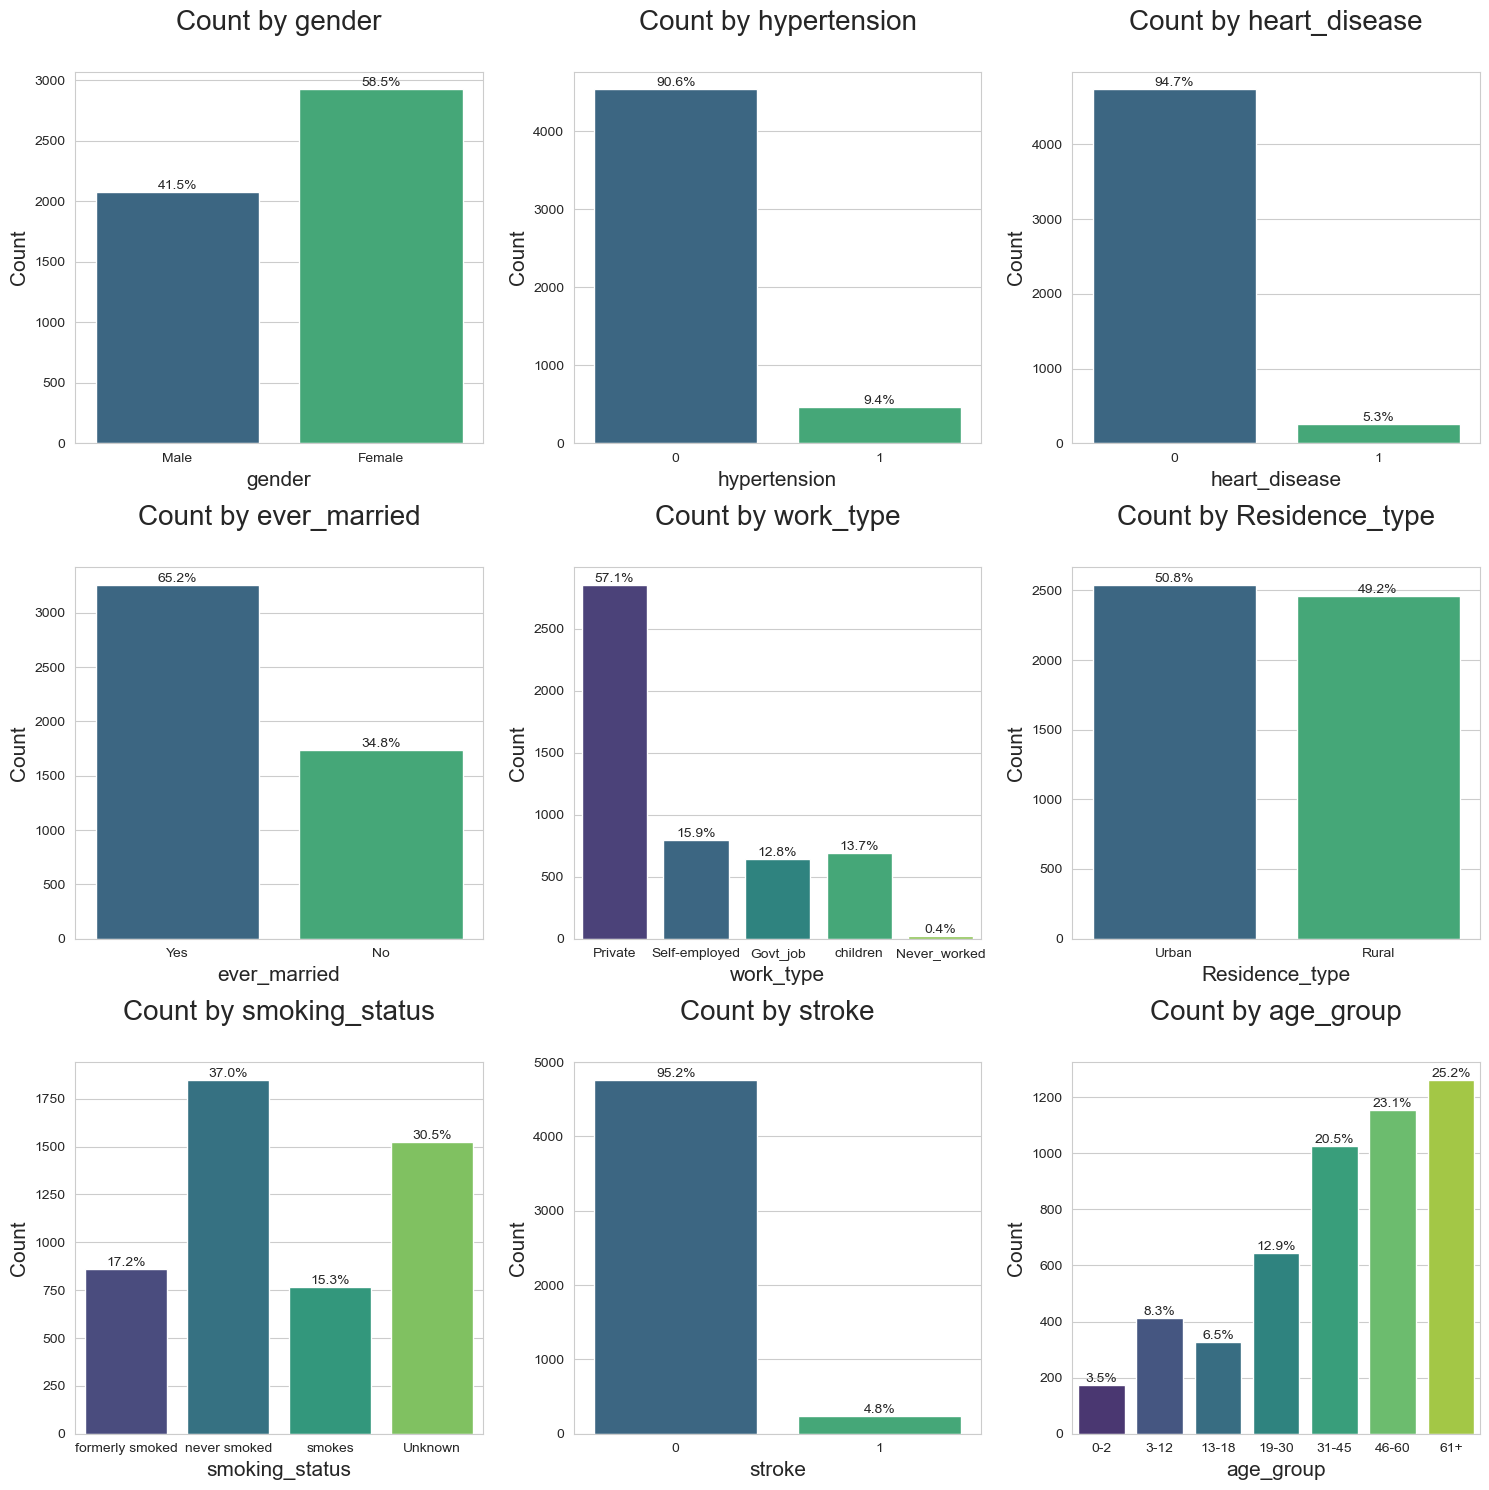

In [25]:
# Plotting the count of categorical variables in the dataset to visualize distribution
variables = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 
             'Residence_type', 'smoking_status', 'stroke', 'age_group']

plt.figure(figsize=(15, 15))
for i, var in enumerate(variables):
    plt.subplot(3, 3, i + 1)
    ax = sns.countplot(data=data, x=var, palette='viridis')
    sns.set_style("whitegrid")
    plt.title(f'Count by {var}', fontsize=20, pad=30)
    plt.xlabel(var, fontsize=15)
    plt.ylabel('Count', fontsize=15)
    total = data[var].count()
    ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')

plt.tight_layout()
plt.savefig('count_of_vars.png', bbox_inches='tight')
plt.show()

In [26]:
# Calculating the percentage of stroke incidence by gender
stroke_by_gender = data.groupby('gender')['stroke'].mean() * 100
print(stroke_by_gender)

gender
Female    4.717949
Male      4.865125
Name: stroke, dtype: float64


In [27]:
# Calculating the percentage of stroke incidence based on hypertension status
stroke_by_hypertension = data.groupby('hypertension')['stroke'].mean() * 100
print(stroke_by_hypertension)

hypertension
0     3.949691
1    12.793177
Name: stroke, dtype: float64


In [28]:
# Calculating the percentage of stroke incidence based on heart disease status
stroke_by_heart_disease = data.groupby('heart_disease')['stroke'].mean() * 100
print(stroke_by_heart_disease)

heart_disease
0     4.139388
1    16.165414
Name: stroke, dtype: float64


In [29]:
# Calculating the percentage of stroke incidence based on smoking status
stroke_by_smoking = data.groupby('smoking_status')['stroke'].mean() * 100
print(stroke_by_smoking)

smoking_status
Unknown            3.083990
formerly smoked    7.781649
never smoked       4.651163
smokes             5.084746
Name: stroke, dtype: float64


In [30]:
# Calculating the percentage of stroke incidence based on work type
stroke_by_work_type = data.groupby('work_type')['stroke'].mean() * 100
print(stroke_by_work_type)

work_type
Govt_job         4.992200
Never_worked     0.000000
Private          4.940434
Self-employed    8.030113
children         0.291121
Name: stroke, dtype: float64


In [31]:
# Calculating the percentage of stroke incidence based on residence type
stroke_by_residence_type = data.groupby('Residence_type')['stroke'].mean() * 100
print(stroke_by_residence_type)

Residence_type
Rural    4.392029
Urban    5.153423
Name: stroke, dtype: float64


In [32]:
# Calculating the percentage of stroke incidence based on age group
stroke_by_age_group = data.groupby('age_group', observed=True)['stroke'].mean() * 100
print(stroke_by_age_group)

age_group
0-2       0.571429
3-12      0.000000
13-18     0.306748
19-30     0.000000
31-45     0.973710
46-60     5.025997
61+      13.391442
Name: stroke, dtype: float64


In [33]:
# Calculating the average age grouped by stroke occurrence
avg_age_by_stroke = data.groupby('stroke')['age'].mean().reset_index()
print(avg_age_by_stroke)

   stroke        age
0       0  41.738765
1       1  67.652720


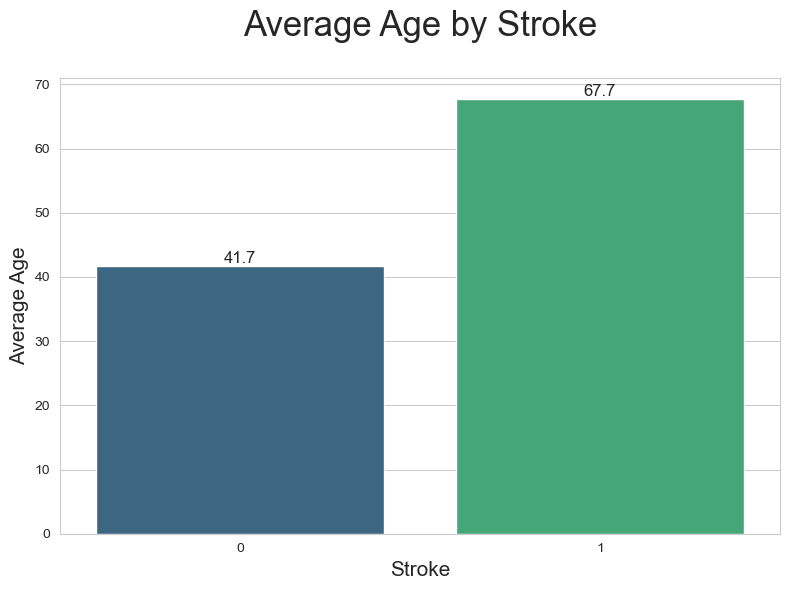

In [34]:
# Creating a bar plot to show the average age grouped by stroke occurrence
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_age_by_stroke, x='stroke', y='age', palette='viridis')
sns.set_style("whitegrid")
plt.title('Average Age by Stroke', fontsize=25, pad=30) 
plt.xlabel('Stroke', fontsize=15)
plt.ylabel('Average Age', fontsize=15)

# Annotating each bar with the average age value
for index, row in avg_age_by_stroke.iterrows():
    plt.annotate(f"{row['age']:.1f}", xy=(index, row['age']), ha='center', va='bottom', fontsize=12)
    
plt.tight_layout()
plt.savefig('avg_age_by_stroke.png', bbox_inches='tight')
plt.show()

In [35]:
# Converting 'hypertension' and 'heart_disease' columns to string type for plotting purposes
data['hypertension'] = data['hypertension'].astype(str)
data['heart_disease'] = data['heart_disease'].astype(str)

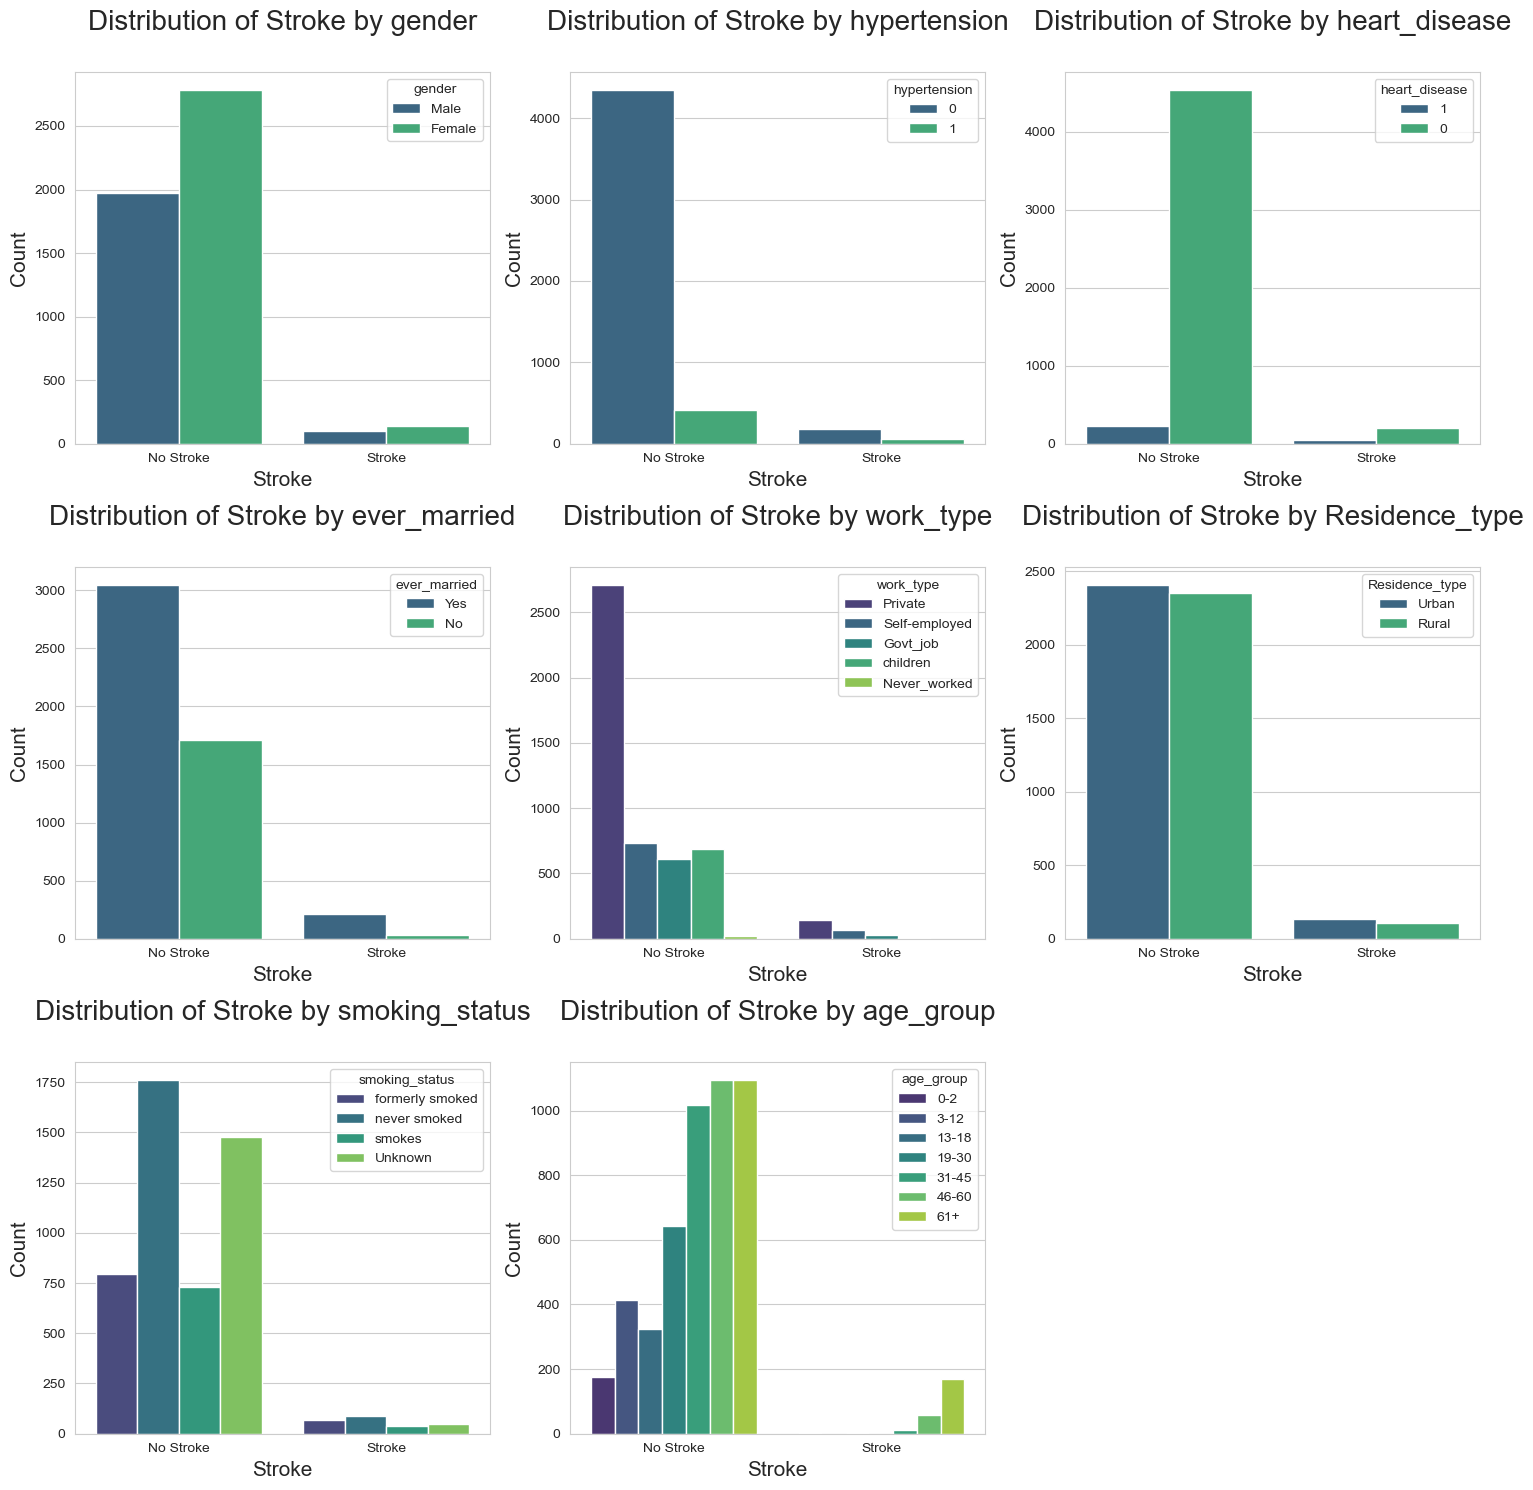

In [36]:
# Creating plots to show the distribution of stroke occurrence across categorical variables
categorical_vars = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 
                     'Residence_type', 'smoking_status', 'age_group']

plt.figure(figsize=(15, 15))
for i, var in enumerate(categorical_vars):
    plt.subplot(3, 3, i + 1)
    # sns.countplot(data=data, x='stroke', hue=var, palette='viridis')
    ax = sns.countplot(data=data, x='stroke', hue=var, palette='viridis')
    sns.set_style("whitegrid")
    plt.title(f'Distribution of Stroke by {var}', fontsize=20, pad=30)
    plt.xlabel('Stroke', fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.legend(title=var, loc='upper right')
    ax.set_xticklabels(['No Stroke', 'Stroke'])
    
plt.tight_layout()
plt.savefig('stroke_dist.png', bbox_inches='tight')
plt.show()

## Statistical Analysis

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


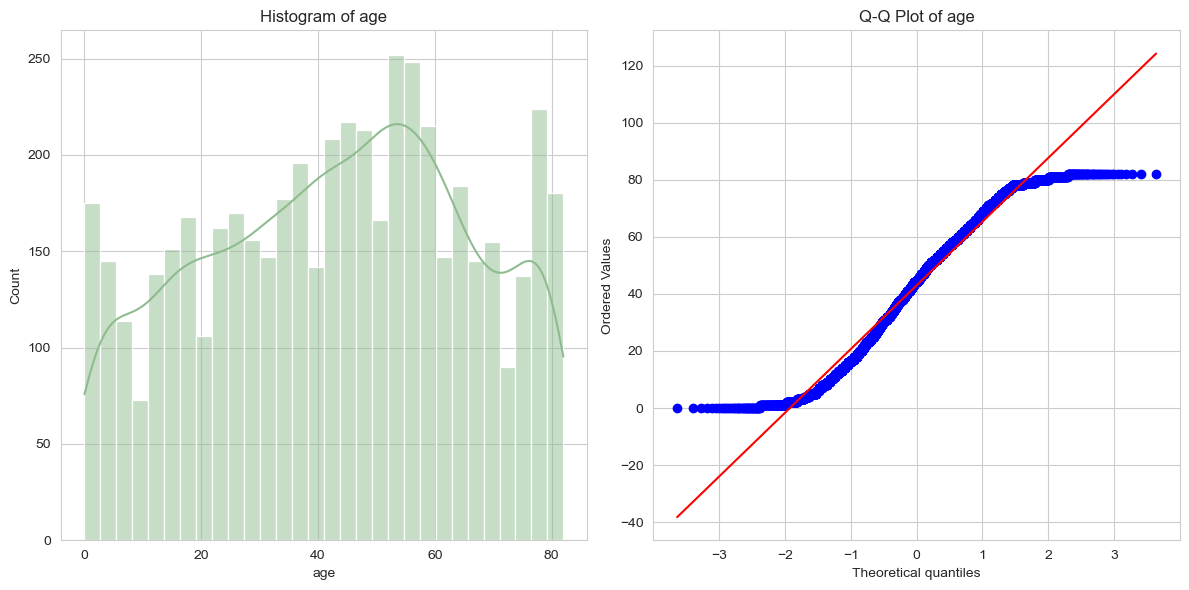

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Normality test results for age:
Shapiro-Wilk Test: p-value = 3.578034357222174e-32
D'Agostino and Pearson Test: p-value = 1.5808077317058133e-243


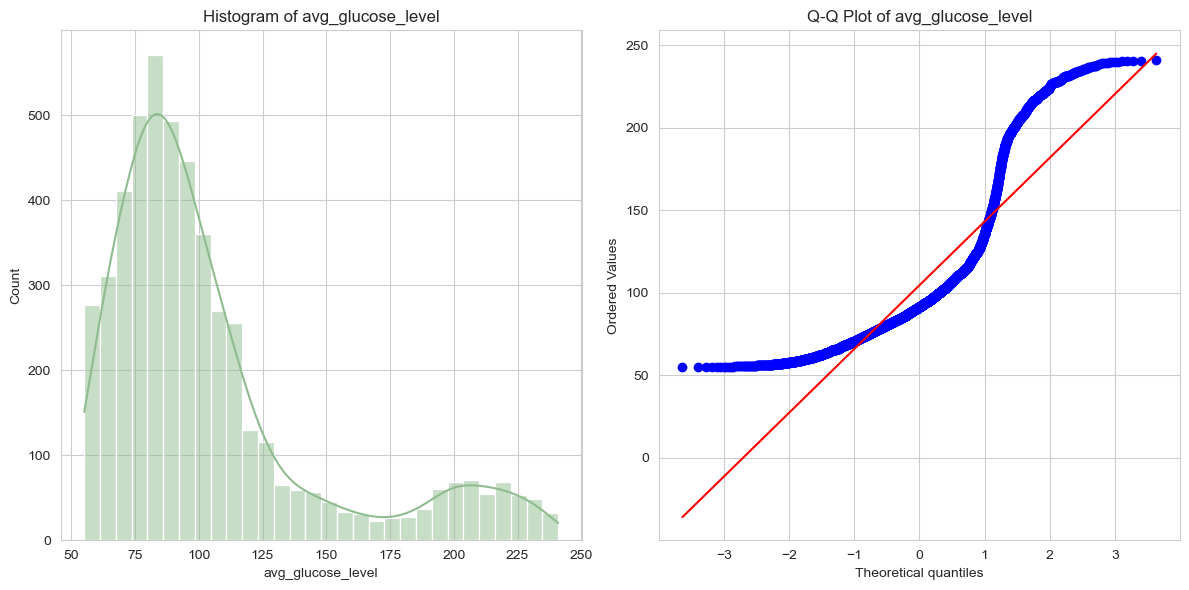

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Normality test results for avg_glucose_level:
Shapiro-Wilk Test: p-value = 0.0
D'Agostino and Pearson Test: p-value = 6.774218009407072e-283


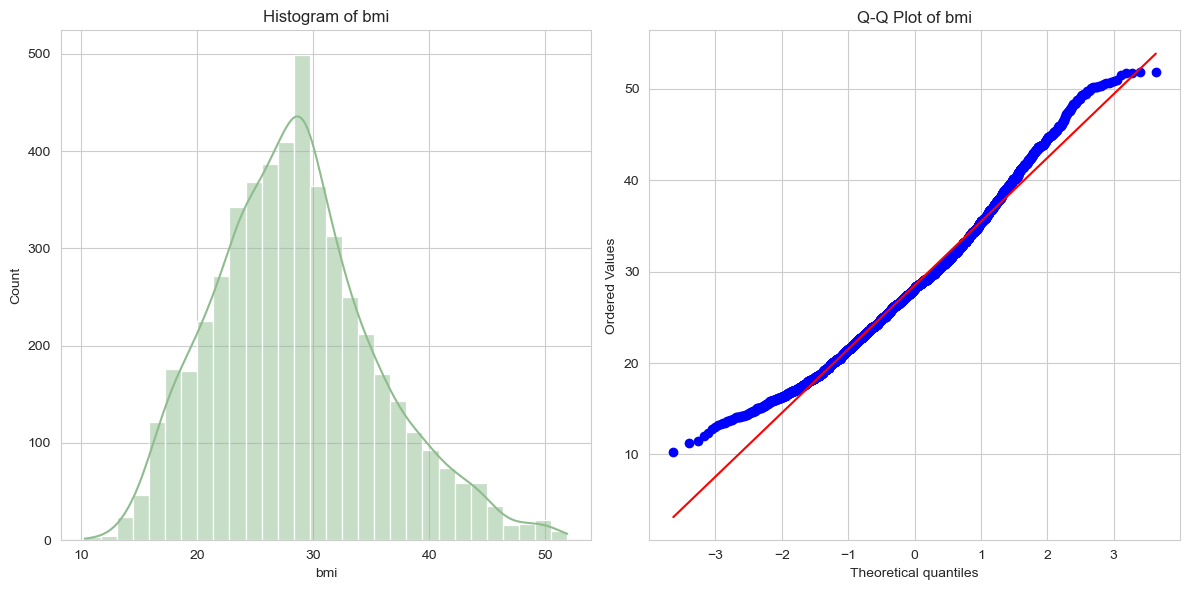

Normality test results for bmi:
Shapiro-Wilk Test: p-value = 1.4683020066135655e-22
D'Agostino and Pearson Test: p-value = 8.799756625160482e-37


/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [38]:
# Plotting histogram with KDE and Q-Q plot for the variable
def plot_distribution(data, variable):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(data[variable].dropna(), kde=True, bins=30, color="darkseagreen")
    plt.title(f'Histogram of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    stats.probplot(data[variable].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {variable}')

    plt.tight_layout()
    plt.savefig(f'histograms_{var}.png', bbox_inches='tight')
    plt.show()

# Performing normality tests (Shapiro-Wilk and D'Agostino tests) on the variable
def test_normality(data, variable):
    stat, p_shapiro = stats.shapiro(data[variable].dropna())
    stat, p_dagostino = stats.normaltest(data[variable].dropna())
    print(f'Normality test results for {variable}:')
    print(f'Shapiro-Wilk Test: p-value = {p_shapiro}')
    print(f'D\'Agostino and Pearson Test: p-value = {p_dagostino}')

variables = ['age', 'avg_glucose_level', 'bmi']

for var in variables:
    plot_distribution(data, var)
    test_normality(data, var)

In [39]:
# Iterating over categorical variables to compute contingency tables and perform Chi-Square tests
for var in categorical_vars:
    if var != 'stroke':  
        # Creating contingency table for each variable against 'stroke'
        contingency_table = pd.crosstab(data[var], data['stroke'])
        print(f"Contingency Table for {var} and stroke:")
        print(contingency_table)

        # Performing Chi-Square test
        chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
        print(f'Chi-Square Test for {var} and stroke: chi2={chi2}, p-value={p}')
        print()

Contingency Table for gender and stroke:
stroke     0    1
gender           
Female  2787  138
Male    1975  101
Chi-Square Test for gender and stroke: chi2=0.029978913574343062, p-value=0.8625380839562116

Contingency Table for hypertension and stroke:
stroke           0    1
hypertension           
0             4353  179
1              409   60
Chi-Square Test for hypertension and stroke: chi2=71.11269501550645, p-value=3.3739215307478217e-17

Contingency Table for heart_disease and stroke:
stroke            0    1
heart_disease           
0              4539  196
1               223   43
Chi-Square Test for heart_disease and stroke: chi2=77.42065336966375, p-value=1.3816288139647157e-18

Contingency Table for ever_married and stroke:
stroke           0    1
ever_married           
No            1712   29
Yes           3050  210
Chi-Square Test for ever_married and stroke: chi2=55.84272112746865, p-value=7.850686968474146e-14

Contingency Table for work_type and stroke:
stroke      

### Average glucose levels by stroke status

In [41]:
# Filtering the data to include only the high-risk age groups with stroke rates greater than 1%
high_stroke_data = data[data['age_group'].isin(stroke_by_age_group[stroke_by_age_group > 1].index)]
high_stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,61+
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,29.1,never smoked,1,61+
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,61+
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,46-60
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,61+
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,68398,Male,82,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0,61+
5102,45010,Female,57,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0,46-60
5105,18234,Female,80,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0,61+
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,61+


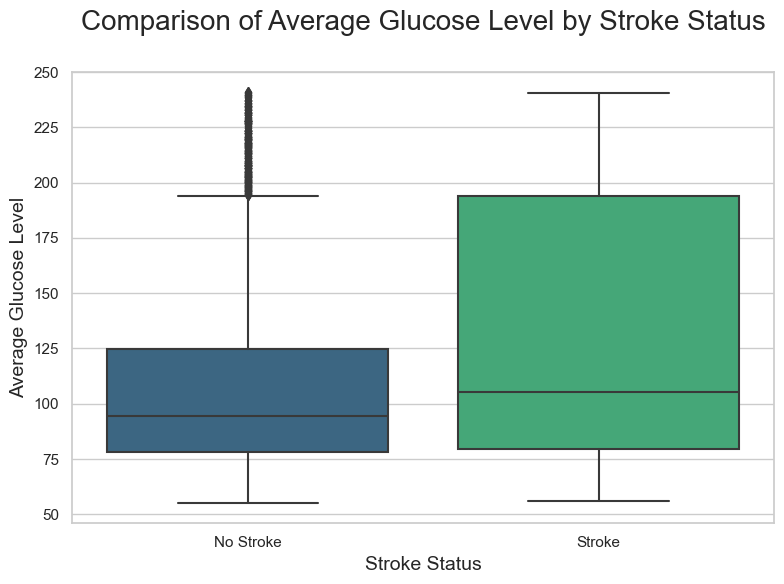

In [42]:
# Creating a boxplot to compare average glucose levels by stroke status, focusing on the high-risk group
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

ax = sns.boxplot(data=high_stroke_data, x='stroke', y='avg_glucose_level', palette='viridis')
plt.title('Comparison of Average Glucose Level by Stroke Status', fontsize=20, pad=30)
plt.xlabel('Stroke Status', fontsize=14)
plt.ylabel('Average Glucose Level', fontsize=14)
ax.set_xticklabels(['No Stroke', 'Stroke'])

plt.tight_layout()
plt.savefig('avg_glucose_by_stroke.png', bbox_inches='tight')
plt.show()

In [43]:
# Calculating and comparing the average glucose levels for patients with and without stroke in the high-risk group
avg_glucose_no_stroke = high_stroke_data[high_stroke_data['stroke'] == 0]['avg_glucose_level'].mean()
avg_glucose_stroke = high_stroke_data[high_stroke_data['stroke'] == 1]['avg_glucose_level'].mean()

print(f'Average avg_glucose_level for patients without stroke: {avg_glucose_no_stroke}')
print(f'Average avg_glucose_level for patients with stroke: {avg_glucose_stroke}')

Average avg_glucose_level for patients without stroke: 112.47019186843308
Average avg_glucose_level for patients with stroke: 129.89590308370043


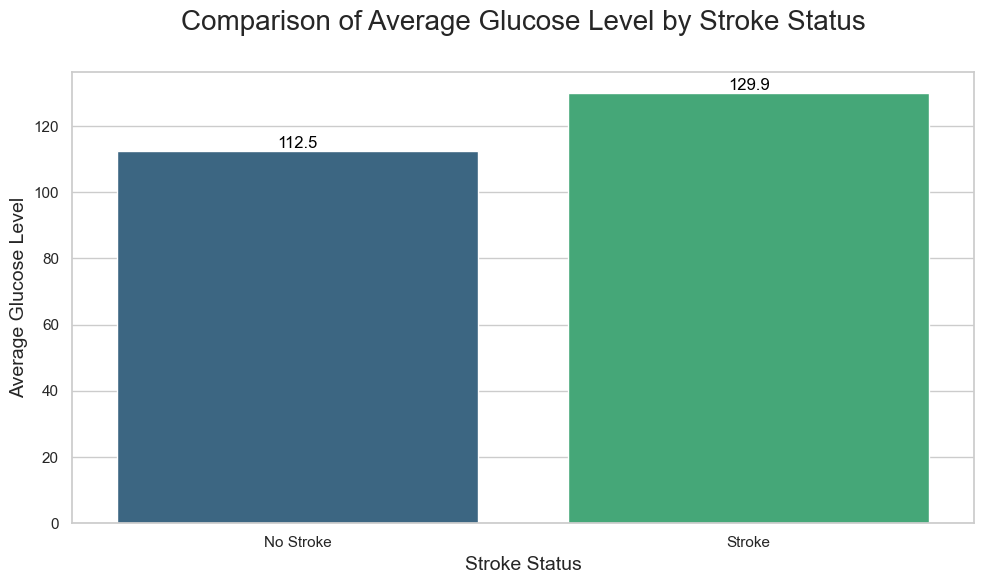

In [44]:
# Creating a DataFrame to store average glucose levels by stroke status
avg_glucose_data = pd.DataFrame({
    'Stroke Status': ['No Stroke', 'Stroke'],
    'Average Glucose Level': [avg_glucose_no_stroke, avg_glucose_stroke]
})

# Plotting a bar chart to compare average glucose levels by stroke status
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(data=avg_glucose_data, x='Stroke Status', y='Average Glucose Level', palette='viridis')

plt.title('Comparison of Average Glucose Level by Stroke Status', fontsize=20, pad=30)
plt.xlabel('Stroke Status', fontsize=14)
plt.ylabel('Average Glucose Level', fontsize=14)

# Annotating bars with average glucose level values
for index, row in avg_glucose_data.iterrows():
    plt.text(index, row['Average Glucose Level'] + 1, f'{row["Average Glucose Level"]:.1f}', 
             ha='center', fontsize=12, color='black')

plt.tight_layout()
plt.savefig('comp_avg_glucose_by_stroke.png', bbox_inches='tight')
plt.show()

In [45]:
# Comparing average glucose levels between stroke and no stroke groups within the high-risk group using Mann-Whitney U Test
stroke_glucose = high_stroke_data[high_stroke_data['stroke'] == 1]['avg_glucose_level'].dropna()
no_stroke_glucose = high_stroke_data[high_stroke_data['stroke'] == 0]['avg_glucose_level'].dropna()

stat, p = stats.mannwhitneyu(stroke_glucose, no_stroke_glucose)
print(f'Mann-Whitney U Test for avg_glucose_level: U={stat}, p-value={p}')

Mann-Whitney U Test for avg_glucose_level: U=285699.0, p-value=0.00019677071016353182


### BMI by stroke status

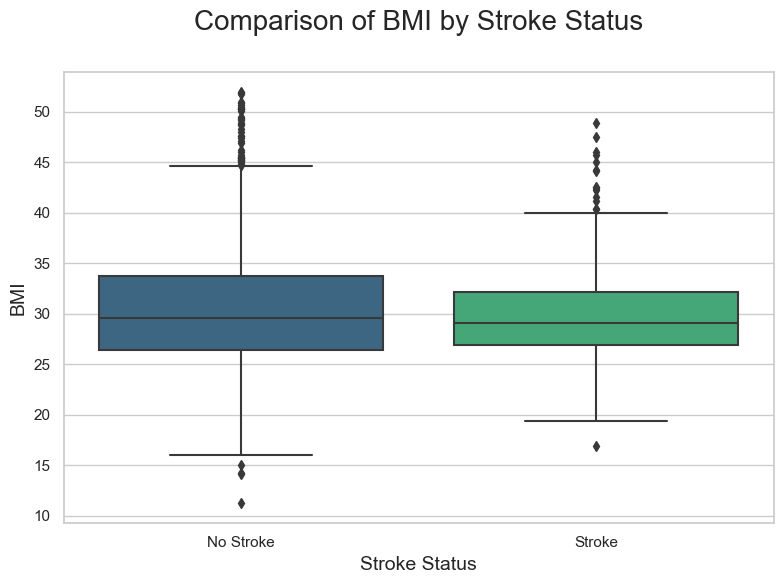

In [47]:
# Creating a boxplot to compare BMI by stroke status, focusing on the high-risk group
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

ax = sns.boxplot(data=high_stroke_data, x='stroke', y='bmi', palette='viridis')
plt.title('Comparison of BMI by Stroke Status', fontsize=20, pad=30)
plt.xlabel('Stroke Status', fontsize=14)
plt.ylabel('BMI', fontsize=14)
ax.set_xticklabels(['No Stroke', 'Stroke'])

plt.tight_layout()
plt.savefig('bmi_by_stroke.png', bbox_inches='tight')
plt.show()

In [48]:
# Calculating and comparing the average BMI for patients with and without stroke in the high-risk group
bmi_no_stroke = high_stroke_data[high_stroke_data['stroke'] == 0]['bmi'].mean()
bmi_stroke = high_stroke_data[high_stroke_data['stroke'] == 1]['bmi'].mean()

print(f'Average bmi for patients without stroke: {bmi_no_stroke}')
print(f'Average bmi for patients with stroke: {bmi_stroke}')

Average bmi for patients without stroke: 30.36126084970306
Average bmi for patients with stroke: 29.96387665198238


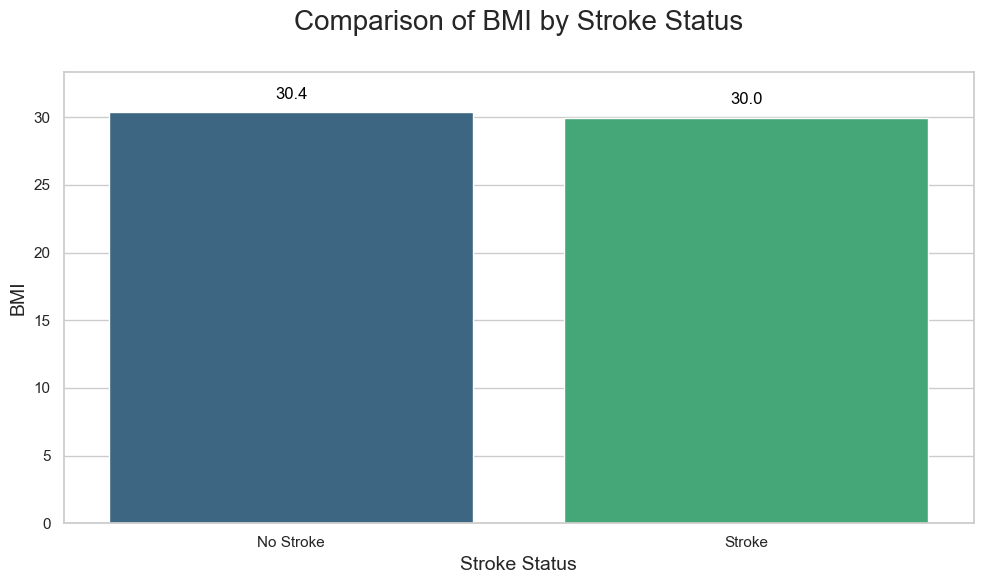

In [49]:
# Creating a DataFrame to store BMI by stroke status
bmi_data = pd.DataFrame({
    'Stroke Status': ['No Stroke', 'Stroke'],
    'BMI': [bmi_no_stroke, bmi_stroke]
})

# Plotting a bar chart to compare BMI by stroke status
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(data=bmi_data, x='Stroke Status', y='BMI', palette='viridis')

plt.title('Comparison of BMI by Stroke Status', fontsize=20, pad=30)
plt.xlabel('Stroke Status', fontsize=14)
plt.ylabel('BMI', fontsize=14)

# Annotating bars with BMI values
for index, row in bmi_data.iterrows():
    plt.text(index, row['BMI'] + 1, f'{row["BMI"]:.1f}', 
             ha='center', fontsize=12, color='black')
    
plt.ylim(0, bmi_data['BMI'].max() + 3)

plt.tight_layout()
plt.savefig('comp_bmi_by_stroke.png', bbox_inches='tight')
plt.show()

In [50]:
# Performing Mann-Whitney U Test to compare BMI between stroke and no stroke groups within the high-risk group
stroke_bmi = high_stroke_data[high_stroke_data['stroke'] == 1]['bmi'].dropna()
no_stroke_bmi = high_stroke_data[high_stroke_data['stroke'] == 0]['bmi'].dropna()

stat, p = stats.mannwhitneyu(stroke_bmi, no_stroke_bmi)
print(f'Mann-Whitney U Test for bmi: U={stat}, p-value={p}')

Mann-Whitney U Test for bmi: U=238731.0, p-value=0.3312268921233087


### Correlation between Average Glucose Level and BMI

In [52]:
# Calculating Spearman and Kendall correlations between avg_glucose_level and BMI
spearman_corr, spearman_p = stats.spearmanr(data['avg_glucose_level'], data['bmi'])
print(f'Spearman correlation: {spearman_corr}, p-value: {spearman_p}')

kendall_corr, kendall_p = stats.kendalltau(data['avg_glucose_level'], data['bmi'])
print(f'Kendall correlation: {kendall_corr}, p-value: {kendall_p}')

Spearman correlation: 0.10976495215867066, p-value: 7.031175419882174e-15
Kendall correlation: 0.07335175757064198, p-value: 8.455226778108998e-15


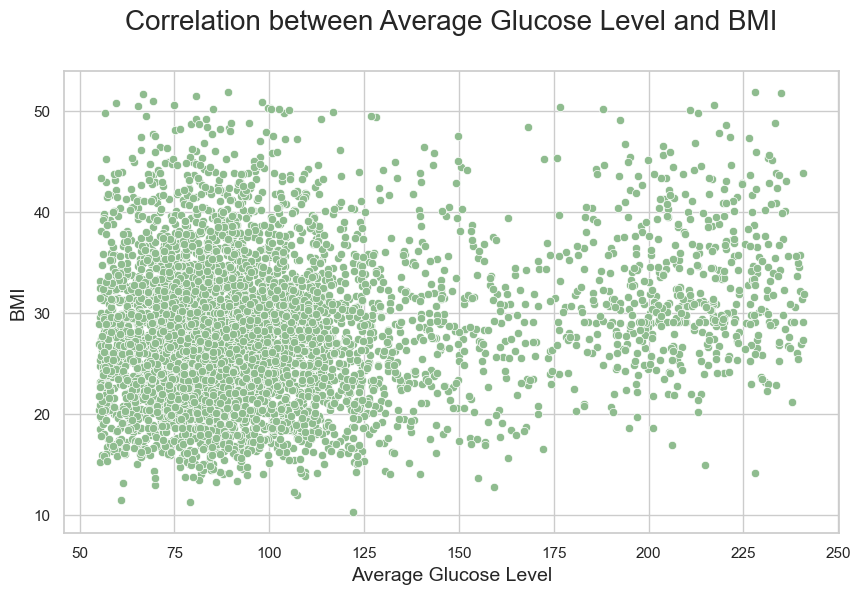

In [53]:
# Creating a scatter plot to visualize the correlation between Average Glucose Level and BMI
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.scatterplot(x='avg_glucose_level', y='bmi', data=data, color='darkseagreen')
plt.title('Correlation between Average Glucose Level and BMI', fontsize=20, pad=30)
plt.xlabel('Average Glucose Level', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.savefig('bmi_glucose_corr.png', bbox_inches='tight')
plt.show()